In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

%matplotlib inline
from preamble import *


CPython 3.6.5
IPython 6.4.0

sklearn 0.19.1
numpy 1.14.3
scipy 1.1.0
matplotlib 2.2.2


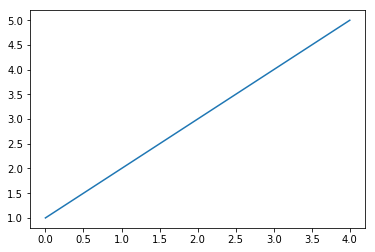

In [6]:
import matplotlib.pyplot as plt

plt.gca().plot([1,2,3,4,5])   # 이전 그림이 없으면 생성
#plt.gca().plot([7,8,9])   #  현재 그림에 그림

In [5]:
from scipy.misc import imread
import matplotlib.pyplot as plt


def plot_animal_tree(ax=None):
    import graphviz
    if ax is None:
        ax = plt.gca()
    mygraph = graphviz.Digraph(node_attr={'shape': 'box'},
                               edge_attr={'labeldistance': "10.5"},
                               format="png")
    mygraph.node("0", "날개가 있나요?")
    mygraph.node("1", "날 수 있나요?")
    mygraph.node("2", "지느러미가 있나요?")
    mygraph.node("3", "매")
    mygraph.node("4", "곰돌이")
    mygraph.node("5", "돌고래")
    mygraph.node("6", "곰")
    mygraph.edge("0", "1", label="True")
    mygraph.edge("0", "2", label="False")
    mygraph.edge("1", "3", label="True")
    mygraph.edge("1", "4", label="False")
    mygraph.edge("2", "5", label="True")
    mygraph.edge("2", "6", label="False")
    mygraph.render("tmp")
    ax.imshow(imread("tmp.png"))
    ax.set_axis_off()

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


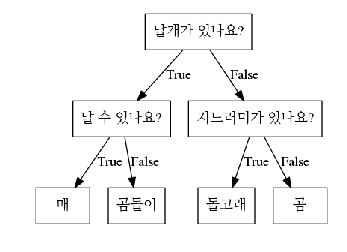

In [6]:
plot_animal_tree()

In [41]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from mglearn.plot_helpers import cm2
from mglearn.tools import discrete_scatter

import re

from sklearn.externals.six import StringIO  # doctest: +SKIP
from sklearn.tree import export_graphviz
from scipy.misc import imread
from scipy import ndimage


def tree_image(tree, fout=None):
    try:
        import graphviz
    except ImportError:
        # make a hacky white plot
        x = np.ones((10, 10))
        x[0, 0] = 0
        return x
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, max_depth=9, impurity=False)
    data = dot_data.getvalue()
    #data = re.sub(r"gini = 0\.[0-9]+\\n", "", dot_data.getvalue())
    data = re.sub(r"samples = [0-9]+\\n", "", data)
    data = re.sub(r"\\nsamples = [0-9]+", "", data)
    data = re.sub(r"value", "counts", data)

    graph = graphviz.Source(data, format="png")
    if fout is None:
        fout = "tmp"
    graph.render(fout)
    return imread(fout + ".png")

def plot_tree_progressive():
    X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
    print("X의 데이터 : {}".format(X))
    print("y의 데이터 : {}".format(y))
    plt.figure()
    ax = plt.gca() ## 그래프의 축을 얻는다.
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xticks(()) ## x tick 설정
    ax.set_yticks(()) ## y tick 설정

    axes = []
    #for i in range(9):
    for i in range(3):
        fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                               subplot_kw={'xticks': (), 'yticks': ()})
        axes.append(ax)
    axes = np.array(axes)

    #for i, max_depth in enumerate([1, 2, 3, 4, 5, 6, 7, 8, 9]):
    for i, max_depth in enumerate([1, 2, 9]):
        #print("i, : {}".format(i))
        #print("max_depth, : {}".format(max_depth))
        tree = plot_tree(X, y, max_depth=max_depth, ax=axes[i, 0])
        axes[i, 1].imshow(tree_image(tree))
        #axes[i, 1].set_axis_off()
        
def plot_tree(X, y, max_depth=1, ax=None):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0).fit(X, y)
    ax = plot_tree_partition(X, y, tree, ax=ax)
    ax.set_title("깊이 = %d" % max_depth)
    return tree

def plot_tree_partition(X, y, tree, ax=None):
    if ax is None:
        ax = plt.gca()
    eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    Z = tree.predict(X_grid)
    Z = Z.reshape(X1.shape)
    faces = tree.apply(X_grid)
    faces = faces.reshape(X1.shape)
    border = ndimage.laplace(faces) != 0
    ax.contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])
    ax.scatter(X1[border], X2[border], marker='.', s=1)

    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return ax



X의 데이터 : [[ 1.878  0.568]
 [ 0.369 -0.349]
 [ 0.965  0.109]
 [ 0.486  0.203]
 [ 1.725  0.534]
 [ 1.48   0.087]
 [ 2.119  0.605]
 [-0.74   0.496]
 [-0.381  1.347]
 [ 0.229  0.88 ]
 [ 1.313 -0.697]
 [ 0.874  0.838]
 [ 0.771 -0.697]
 [ 1.263  0.129]
 [-0.72   0.691]
 [ 0.792 -0.405]
 [ 1.319 -0.414]
 [ 0.266  0.782]
 [ 0.087  0.494]
 [-0.749 -0.07 ]
 [ 0.884 -0.354]
 [ 1.027  0.733]
 [ 0.739  0.308]
 [ 1.129  0.332]
 [ 1.155 -0.506]
 [ 1.568 -0.059]
 [ 0.29   1.008]
 [ 0.641 -0.199]
 [-1.2    0.464]
 [-0.17   0.607]
 [-0.534  0.502]
 [ 1.005  0.387]
 [ 0.653  0.809]
 [-0.567  0.73 ]
 [ 1.719  0.329]
 [ 0.965  0.518]
 [ 0.268 -0.11 ]
 [ 1.509 -0.067]
 [-0.594  0.468]
 [-1.065  0.568]
 [ 0.55   1.166]
 [-0.339  1.17 ]
 [-0.517  0.745]
 [-0.463  0.863]
 [ 1.685  0.334]
 [ 1.533 -0.031]
 [ 1.223 -0.369]
 [ 0.915 -0.504]
 [ 0.56  -0.165]
 [-1.181  0.209]
 [-0.047 -0.016]
 [ 1.385 -0.476]
 [ 0.974 -0.086]
 [-0.029 -0.056]
 [ 0.62   0.752]
 [ 1.764 -0.126]
 [ 0.067 -0.339]
 [ 1.658  0.211]
 [ 0.

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


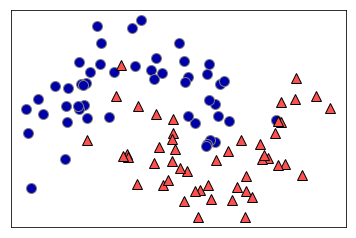

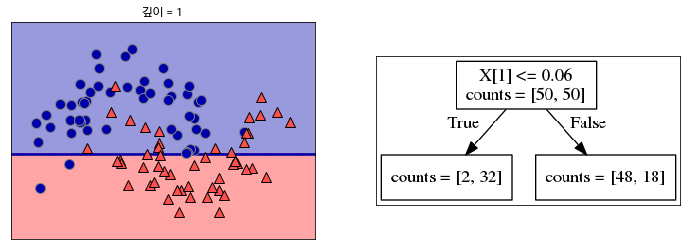

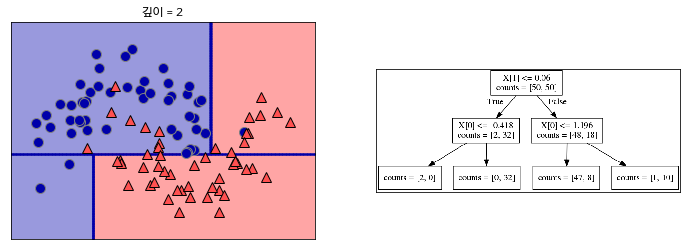

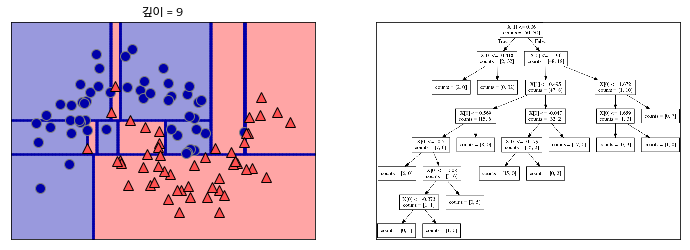

In [42]:
plot_tree_progressive()